# k-means 클러스터링의 최적의 k값을 찾는 방법


- 많이 쓰이는 순서대로 나열함 
1. 비즈니스 도메인 지식
    - 정성적인(수치화x) 선정 방법 
    - 데이터적인 근거는 다소 부족하지만, 클러스터링 자체가 해석을 통한 비즈니스 인사이트 도출이 주 목적이기 때문에 많은 프로젝트에서 이 방법을 사용
    
    
2. 엘보우 기법(Elbow method)
    - 군지 내 중심점과 관측치 간 거리 합(Inertia value)이 **급감**하는 구간의 k개수를 선정 
    - 군집의 수가 k개 였을때보다 k+1개일 때 거리합이 급감했다는 것은 유사한 속성의 관측치들끼리 잘 묶였다는 것을 의미 
    - 따라서 k가 더 증가해도 거리합이 별로 줄어들지 않을 때는 k를 더 증가시킬 필요가 없다는 의미
        - 이 때의 그래프 모양이 팔꿈치(Elbow)형태를 하고 있기 때문에 엘보우 기법이라고 불림 


3. 실루엣 계수(Silhouette coefficient) 활용 (논문 쓰시는 교수님들 좋아하심) 
    - 실루엣 계수 : 군집 안의 관측치들이 다른 군집과 비교해서 얼마나 비슷한지를 나타내는 수치 
    - 동일한 군집 안에 있는 관측치들 간의 평균 거리와 가장 가까운 다른 군집과의 평균거리를 구해 실루엣 계수를 계산 
    - $$ S(i) = \frac{b(i) - a(i)}{\max{a(i), b(i)}} $$
        - $ a(i) $ : i와 동일한 군집에 속한 관측치들 간의 평균 거리
        - $ b(i) $ : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리 

    - 동일한 군집 내 관측치들 간 평균 거리가 집단 간 평균 거리보다 짧을수록 실루엣 계수는 높아짐 
        - 범위는 -1부터 1사이의 값을 가지며 실루엣 계수가 1에 가까울수록 군집이 적합하게 나누어졌음을 의미 


즉, 비지도 학습은 앞에서 배운 지도학습보다 좀 더 비즈니스 인사이트에 맞춰짐
    - ex)회원들의 나이, 직업, 월평균소비, 구매패턴 등등
    - 요약 : 그모델로 멋진 분석이 메인이다 = 비지도 학습 
    - 학술적인 근거보다 뽑아낼 수 있는 정보량이 요지이다

- kmeans 의 한계가 있기 때문에 다른 알고리즘을 가져와야 함 
- 사람은 밀도로 군집을 판단한다. 데이터도 마찬가지, 밀도가 높으면 집단으로 인식함

# DBSCAN 

- 아무리 k값을 잘 지정한다고 해도 데이터의 형태가 k-means 클러스터링 알고리즘에 적합하지 않으면 효과적인 군집화를 할 수가 없음
- 밀도 기반의 원리를 이용한 클러스터링 기법이 DBSCAN(Densitiy-Based Spatial Clustering of Applications with noise) 
- DBSCAN 은 별도의 k값 지정이 필요 없고 관측치들의 밀도를 통해 자동으로 적절한 군집의 수를 찾음 
    - 밀도를 측정하려면 두 가지 기준이 필요
        - 기준 관측치로부터 '이웃'한 관측치인지 구별할 수 있는 거리 기준(epsilon)이 필요
            - 거리 기준값이 크면 데이터 공간상 멀리 있는 관측치도 이웃한 관측치로 인식 
            
        - 거리 기준 내에 포함된 이웃 관측치 수(minPts)에 대한 기준이 필요
            - 특정 거리 안에 몇 개 이상의 관측치가 있어야 하나의 군집으로 판단할 것인가를 결정 
            
            
- 기준 밀도를 가진 관측치들을 기준으로 군집화를 하기 때문에 U자형 같이 오목한 데이터나 H와 같은 모양의 데이터 분포도 효과적으로 군집화할 수 있고 군집이 명확하지 않은 이상치를 잘분류해낼 수 있음 
    - kmeans 는 이상치에 굉장히 민감 
    
- 단점
    - k-means에 비해 필요한 연산량이 많음
        - 특히 독립변수가 늘어날수록 필요한 연산량이 급증하기 때문에 변수를 적절히 설정해줘야 함 
    - 데이터 특성을 모를 경우에는 적절한 파라미터 값을 설정하는 것이 어려움 

# 군집화 모델 분석

- 군집화 모델은 분류된 각 군집의 특성을 파악 하여 군집에 이름을 붙여서 그 특징을 정의하는 작업이 무엇보다 중요 
    - 클러스터링에 사용한 독립변수들이 다른 군집들에 비해서 어떠한 특성을 가지고 있는지를 확인하여 각 군집을 명확하여 정의해야 함 
    - 그 다음 각 군집의 특성에 맞는 비즈니스 전략을 수립 
    
- 각 군집에 어느 정도의 데이터가 할당 되었는지 확인하여, 특정 군집에 너무 많은 데이터가 쏠렸거나 너무 적은 데이터가 할당되어 군집으로서 효율성이 떨어지는 군집은 없는지 확인 
- 각 독립변수들이 다른 군집 혹은 전체 평균과 얼마나 다른지 확인하여 군집의 특성을 파악 
    - 이를 통해 군집의 이름을 설정
    - 특성이 확실하여 쉽게 정의할 수 있는 군집도 있지만, 별다른 특성이 없는 군집도 있을 수 있음
        - 이 경우 무리해서 억지로 군집을 정의하기 보다는 비슷한 군집끼리 묶어서 "일반 고객" 등으로 별도 분류하는 것도 하나의 방법 
        
- 군집 간의 수치적 차이를 보다 확실하게 파악하기 위해서는 t-test나 ANOVA 등을 통해 군집 간 평균값 차이가 우연한 차이인지, 통계적으로 유의미한 차이인지 검증하는 절차를 거치는 것이 좋음 

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# KElbowVisualizer, SilhouetteVisualizer 시각적으로 확인 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('./data/Mall_Customers.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.shape

(200, 5)

In [42]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- 결측치 없음

In [44]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
# 산점도 행렬 시각화

# ID 컬럼 제거
df1 = df.drop('CustomerID', axis = 1)

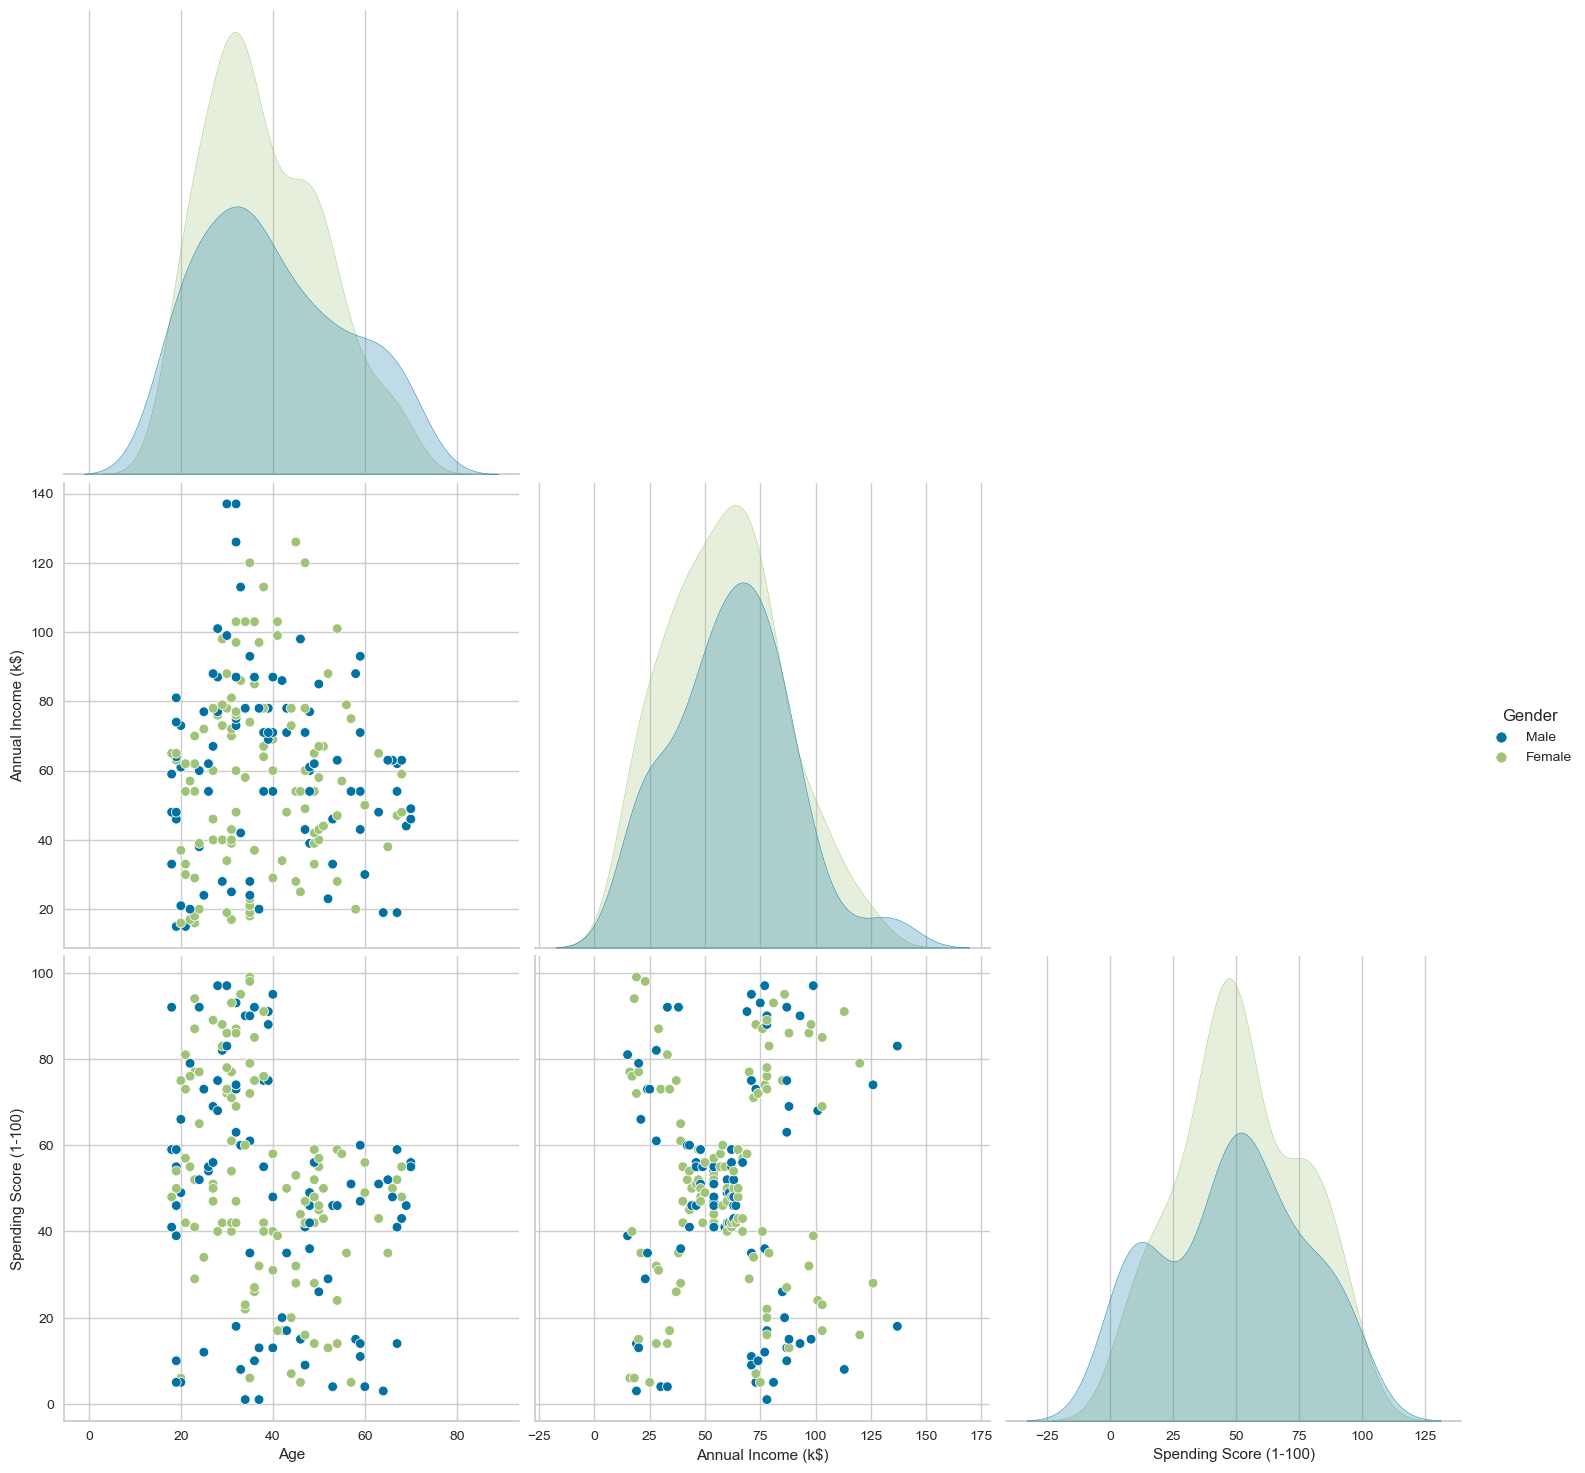

In [46]:
sns.pairplot(df1, diag_kind='kde', # 대각선을 분포로 표시 
             hue = 'Gender', corner= True, height=5) # corner는 True : 한쪽만 그려줌
plot_kws = {'s' : 100}

plt.show()

- 각 변수 간의 관계를 파악하기 위해 산점도 행렬을 시각화하여 분포를 확인
- spending score 변수와 annual income 변수와의 관계에서 약 5개 정도의 군집이 나눠질 수 있을 것으로 보임
    - 연령과 성별 변수도 함께 사용하여 군집화할 예정이므로 이러한 분포는 참고로만 사용 

In [47]:
# df1 이렇게 생김
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Gender 데이터 스케일링 

1. 원핫인코딩
    Male, Female : 2개의 컬럼중 하나만 사용함(2진일때는 상관무)
    
2. 레이블인코딩
    역시 결과적으로 차이무 

In [48]:
# 데이터 스케일링 

# Gender 변수 가변수 처리
df2 = pd.get_dummies(df1, columns = ['Gender'], drop_first = True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [49]:
# 정규화 스케일링 
mm = MinMaxScaler()
df_minmax = mm.fit_transform(df2)

In [50]:
df_minmax

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

In [51]:
df_minmax = pd.DataFrame(data = df_minmax, columns= df2.columns)
df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [52]:
# k-means 클러스터링 모델 생성
# 설정할 수 있는 하이퍼파라미터

# n_init : 초기화 => 후보들을 뽑아서 괜찮은 녀석들을 정함 
km_1 = KMeans(init= 'k-means++', n_clusters = 3, n_init=10, max_iter=300,
              random_state=11)

km_1.fit(df_minmax)

KMeans(n_clusters=3, n_init=10, random_state=11)

In [53]:
# 최저 SSE 값
print(km_1.inertia_)

# 각 군집의 중심점 좌표 확인 
print(km_1.cluster_centers_)

# 반복횟수
print(km_1.n_iter_)

# 독립변수 4 개니까 

29.552857611943853
[[3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]
 [1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]]
5


<Axes: >

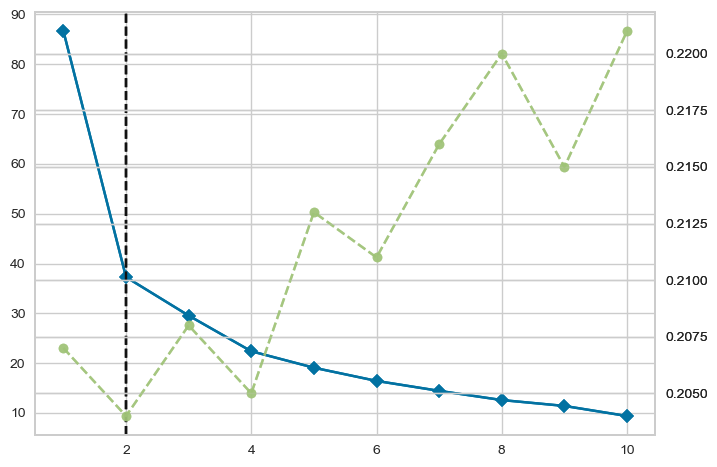

In [54]:
# 엘보우 차트 시각화

# k를 1~10까지 넣어서 실험 
elbow_chart = KElbowVisualizer(km_1, k = (1, 11))
elbow_chart.fit(df_minmax)
elbow_chart.draw()

- 훈련시간이라 컴퓨터에 따라 표가 다르게 나올 수 있음
- 성별이 조금 영향이 다르게 나오는 것 같음 

- 표의 대한 요약
- k = 2 지점에서 경사가 급감하는 모습을 보이고 있음
    - 성별 변수 때문일 것으로 예상 

In [55]:
# 실루엣 계수의 평균 (Score)시각화1

# 각 K의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성

# k 를 2~10까지 올려가면서 측정 
for k in range(2, 11):
    km_silhouette = KMeans(n_clusters= k, random_state= 11)
    km_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, km_silhouette.labels_)
    silhouette_coef.append(score)

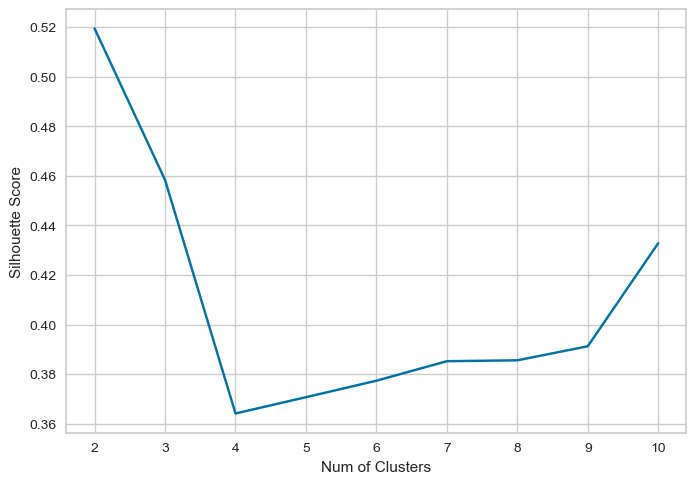

In [56]:
# 실루엣계수 2일때가 제일 좋음 
plt.plot(range(2, 11), silhouette_coef)

plt.xticks(range(2, 11))
plt.xlabel('Num of Clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

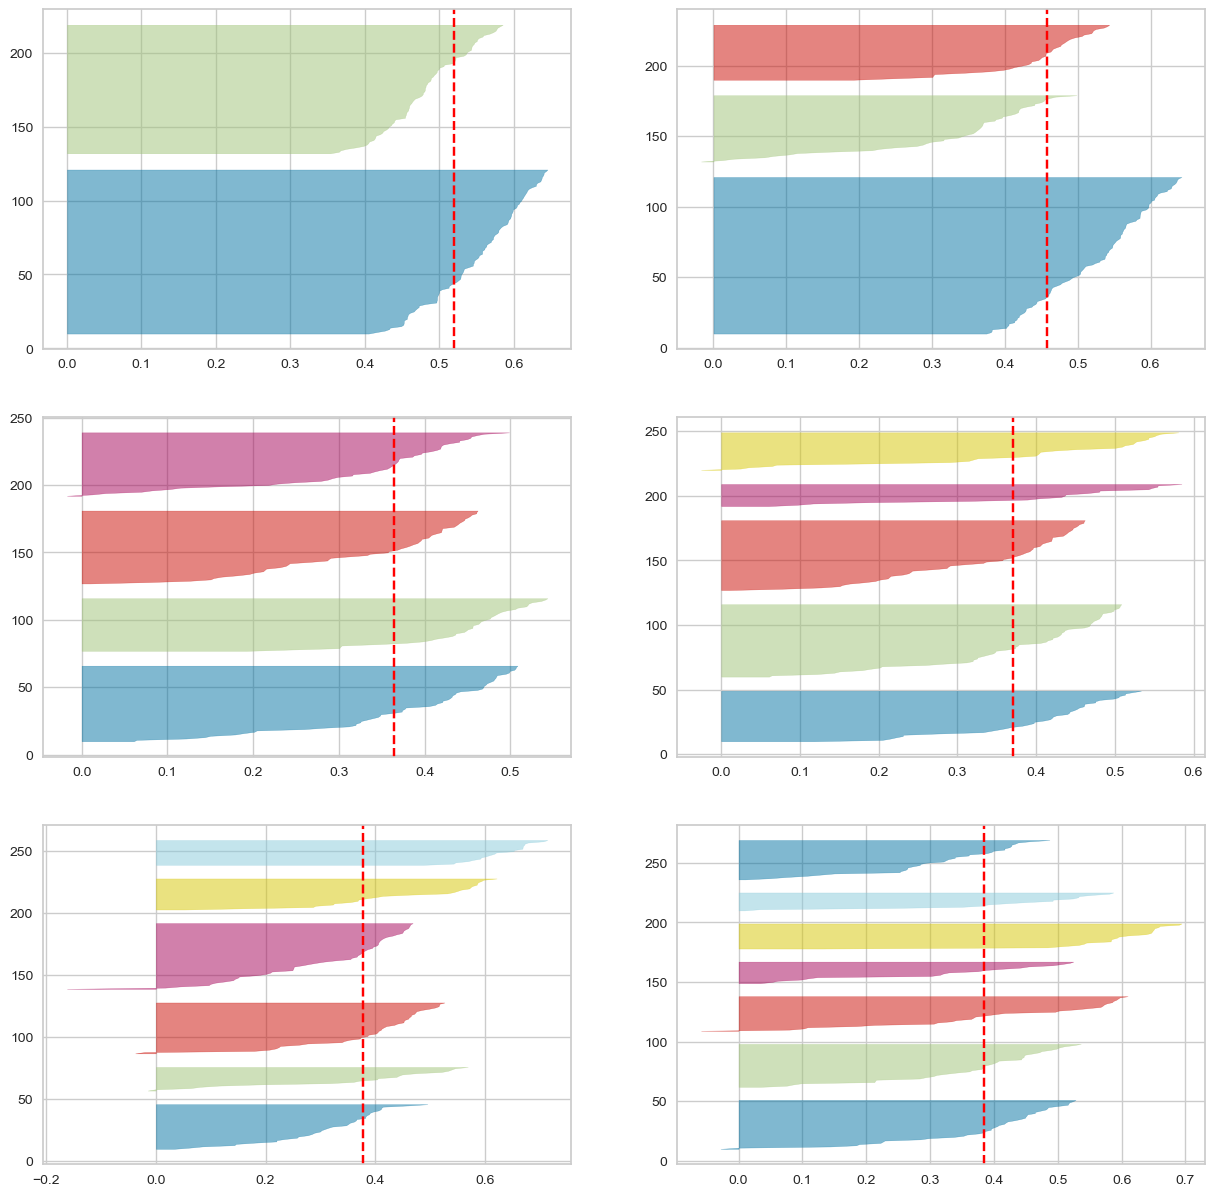

In [57]:
# 실루엣 계수 시각화 2 
fig, ax = plt.subplots(3, 2, figsize = (15, 15))

for i in [2, 3, 4, 5, 6, 7]:
    # k-means 클러스터링 모델 생성
    km_3 = KMeans(n_clusters=i, random_state=11)
    q, mod = divmod(i, 2)
    
    # 실루엣 계수 시각화
    visualizer = SilhouetteVisualizer(km_3, colors= "yellowbrick", ax = ax[q-1][mod])
    visualizer.fit(df_minmax)

- 시각화 그림이 나란히 균등하게 나오는 것이 제일 좋음 
- 4개의 군집이 관측치가 비교적 균등하게 나뉘며 실루엣 계수의 편차도 고른 편
- 6개의 군집부터는 일부 실루엣 계수의 음수가 크게 나타남 

In [58]:
# k-means 클러스터 시각화

km_4 = KMeans(n_clusters= 4, random_state= 11)

# 군집 번호 결합
df2['cluster1'] = km_4.fit_predict(df_minmax)

In [59]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster1
0,19,15,39,True,1
1,21,15,81,True,1
2,20,16,6,False,2
3,23,16,77,False,0
4,31,17,40,False,0


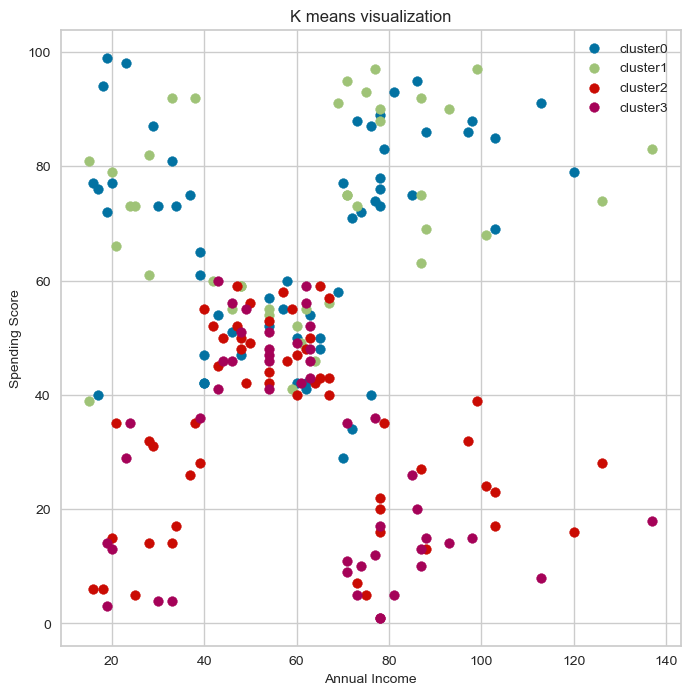

In [60]:
# 시각화 설정 
plt.figure(figsize = (8, 8))

for i in range(df2['cluster1'].max() + 1):
    plt.scatter(df2.loc[df2['cluster1'] == i, 'Annual Income (k$)'], # 연간 소득
                df2.loc[df2['cluster1'] == i, 'Spending Score (1-100)'], # 결제 점수
                label = 'cluster' + str(i))
    
plt.legend()
plt.title('K means visualization', size = 12)
plt.xlabel('Annual Income', size = 10)
plt.ylabel('Spending Score', size = 10)
plt.show()

- 위의 시각화만 가지고 분석을 하기가 조금 어려움 

In [61]:
# DBSCAN 모델 생성 및 시각화
dbscan = DBSCAN(eps = 0.7, min_samples = 5)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
df2['cluster2'] = dbscan.fit_predict(df_minmax)

In [62]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cluster1,cluster2
0,19,15,39,True,1,0
1,21,15,81,True,1,0
2,20,16,6,False,2,1
3,23,16,77,False,0,1
4,31,17,40,False,0,1


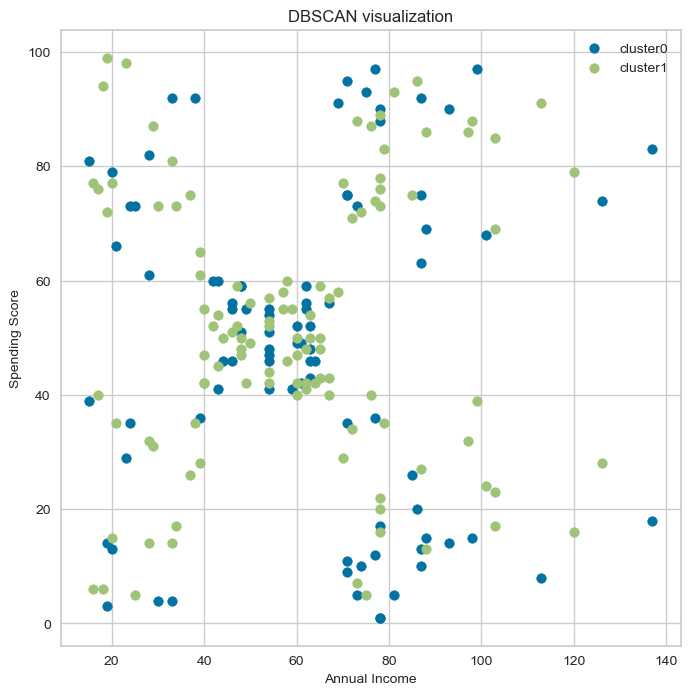

In [63]:
# 시각화 설정
plt.figure(figsize = (8,8))

for i in range(df2['cluster2'].max() + 1):
    plt.scatter(df2.loc[df2['cluster2'] == i, 'Annual Income (k$)'], # 연간 소득
                df2.loc[df2['cluster2'] == i, 'Spending Score (1-100)'], # 결제 점수
                label = 'cluster' + str(i))
    
plt.legend()
plt.title('DBSCAN visualization', size = 12)
plt.xlabel('Annual Income', size = 10)
plt.ylabel('Spending Score', size = 10)
plt.show()

- cluster를 2개로 나눔 (2개가 적절)
- 성별이 강하게 영향을 준 것 같음

- 밀도기반의 DBSCAN 모델은 군집 수가 자동으로 설정 
    - 관측치 간의 거리를 설정하는 eps 옵션과 한 군집에 속하는 최소 관측치 수를 설정하는 min_samples 옵션을 통해 군집 수를 간접적으로 조정할 수 있음 

In [64]:
# k-means 군집 별 특성 확인

# 분석에 따라 평균이나 합계 등등 확인하지만
# 이번에는 데이터 특성에 따라 전체 평균을 하나하나 냄 
df_kmeans = df2.groupby(['cluster1']).agg({'Age' : 'mean',
                                           'Annual Income (k$)' : 'mean',
                                          'Spending Score (1-100)' : 'mean',
                                           'Gender_Male' : 'mean'}).reset_index()

# cnt : 각각 군집의 개수 
df_kmeans['cnt'] = df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,28.438596,59.666667,67.684211,0.0,57
1,1,28.250000,62.000000,71.675000,1.0,40
2,2,48.109091,58.818182,34.781818,0.0,55
3,3,49.437500,62.416667,29.208333,1.0,48


- 나이는 0&1번 비슷, 2&3 번 비슷
- 0번 과 1번이 결제태도가 좋음/ 2 & 3번 나쁨 
- 득은 전체적으로 비슷
- 성별이 영향을 줌 

In [65]:
# DBSCAN 군집 별 특성 확인 
df_dbscan = df2.groupby(['cluster2']).agg({'Age' : 'mean',
                                           'Annual Income (k$)' : 'mean',
                                          'Spending Score (1-100)' : 'mean',
                                           'Gender_Male' : 'mean'}).reset_index()

# cnt : 각각 군집의 개수 
df_dbscan['cnt'] = df2.groupby('cluster2')['Age'].count()
df_dbscan.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112


- 다른애들은 비슷비슷하고 성별에서 차이가 많이 나옴 => 성별을 제거해도 될 것 같다

- DBSCAN 모델의 경우 성별에 따라 2개의 군집으로 나뉘어 졌음 
- 성별이 범주형 변수이기 때문에 변별력이 강해서 다른 변수의 영향력을 압도한 것으로 보임 
    - 비즈니스 적으로 의미 있는 군집을 만들기 위해서는 성별 변수를 제거하거나 다른 변수를 추가해야함